In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
from pylab import rcParams
import seaborn as sns
import scipy.stats
%matplotlib inline


import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [7]:
# 1. Load the cars dataset.
df = pd.read_csv('autos_small.csv')
#df = pd.read_csv('C:\\Users\\SHUBHA\\Desktop\\Session-1-Introduction-To-Data-Analytics-Assignment\\dataset\\autos_small.csv')
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [8]:
df.isnull().any()

price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                10000 non-null  int64 
 1   name                 10000 non-null  object
 2   yearOfRegistration   10000 non-null  int64 
 3   monthOfRegistration  10000 non-null  int64 
 4   gearbox              9423 non-null   object
 5   powerPS              10000 non-null  int64 
 6   model                9433 non-null   object
 7   kilometer            10000 non-null  int64 
 8   fuelType             9057 non-null   object
 9   brand                10000 non-null  object
 10  vehicleType          8950 non-null   object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [10]:
# 2. Figure out the best strategy to fill missing values
#df.dropna(inplace=True)

#Filling the missing values with mean for continuous data
df=df.fillna(df.mean())

#Filling the missing values with mode for categorical value data
df['gearbox'] = df['gearbox'].fillna(df['gearbox'].mode().iloc[0])
df['model'] = df['model'].fillna(df['model'].mode().iloc[0])
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].mode().iloc[0])
df['vehicleType'] = df['vehicleType'].fillna(df['vehicleType'].mode().iloc[0])
df.isnull().any()


price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                False
powerPS                False
model                  False
kilometer              False
fuelType               False
brand                  False
vehicleType            False
dtype: bool

In [11]:
# 3. Complete any other preprocessing required.
### dropping car name from data because this column does not have much variation
### if same car name appears in test data then the model will have perfect price prediction
df=df.drop(['name'], axis =1)


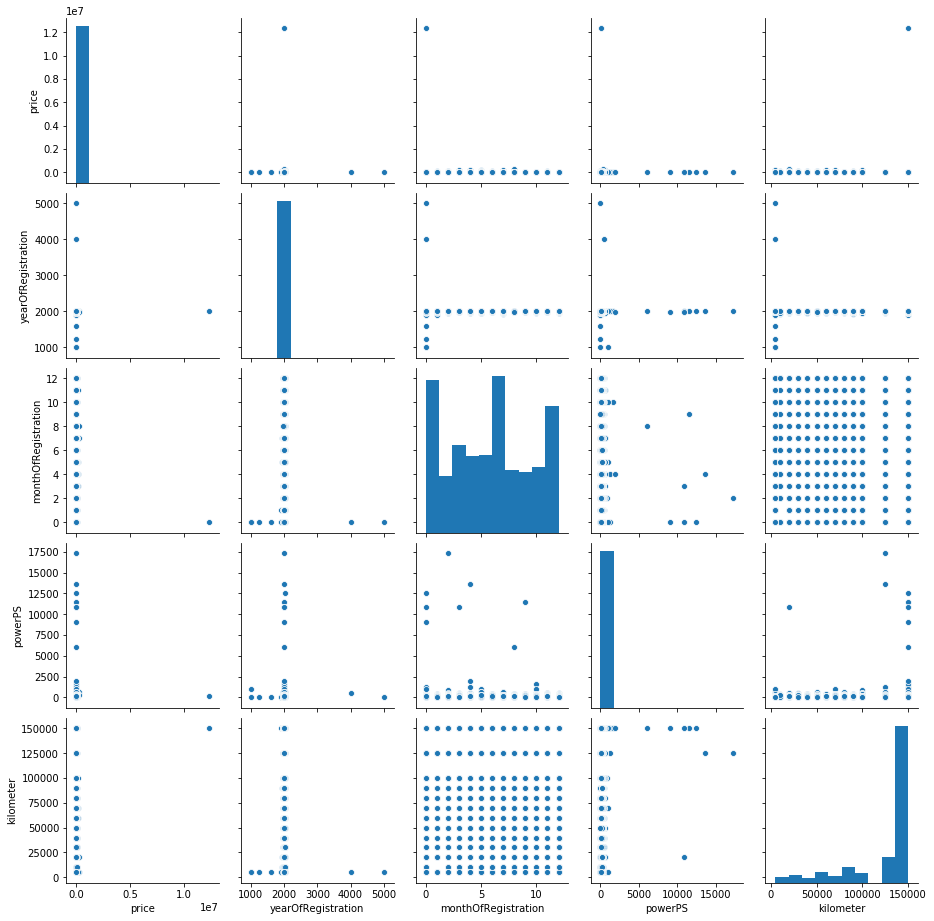

In [12]:
import seaborn as sns

### none of the variables in the pair plot seem to have any variation with price
sns.pairplot(df)

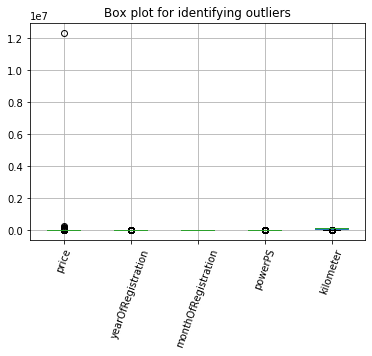

In [13]:
#Removing outliers 
#plt.xticks(rotation=70)
df.boxplot(rot=70)
plt.title('Box plot for identifying outliers');

In [14]:
df.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


In [15]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print(df.shape)
df_out = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 1.5 * IQR)))]
df_out = df[~((df['yearOfRegistration'] < (Q1 - 1.5 * IQR)) |(df['yearOfRegistration'] > (Q3 + 1.5 * IQR)))]
df_out = df[~((df['monthOfRegistration'] < (Q1 - 1.5 * IQR)) |(df['monthOfRegistration'] > (Q3 + 1.5 * IQR)))]
df_out = df[~((df['powerPS'] < (Q1 - 1.5 * IQR)) |(df['powerPS'] > (Q3 + 1.5 * IQR)))] 
df_f = df[~((df['kilometer'] < (Q1 - 1.5 * IQR)) |(df['kilometer'] > (Q3 + 1.5 * IQR)))] 
print(df_f.shape)
df_f.head()
  


(10000, 10)
(241, 10)


,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
22,1000,1999,0,manuell,0,mx_reihe,5000,benzin,mazda,limousine
73,27500,1931,7,manuell,39,andere,10000,benzin,ford,cabrio
79,150,2000,1,manuell,0,golf,5000,benzin,sonstige_autos,limousine
114,799,1998,4,manuell,75,astra,5000,benzin,opel,cabrio
140,1,1995,3,manuell,75,transporter,5000,diesel,volkswagen,bus


In [16]:
df_f.select_dtypes(exclude=["number"])
df_d = pd.get_dummies(df_f, columns = ["gearbox","model","fuelType","brand","vehicleType"])
df_d.head(5)

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox_automatik,gearbox_manuell,model_156,model_1_reihe,model_2_reihe,...,brand_trabant,brand_volkswagen,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
22,1000,1999,0,0,5000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
73,27500,1931,7,39,10000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
79,150,2000,1,0,5000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
114,799,1998,4,75,5000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
140,1,1995,3,75,5000,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [17]:
X = df_d.iloc[:, 1:].values
Y = df_d.iloc[:, 0].values


In [18]:
# feature importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y)
# display the relative importance of each attribute
#print(model.feature_importances_)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [19]:
importances = model.feature_importances_
feature_names = df.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
features

[('yearOfRegistration', 0.15833422377480288),
 ('monthOfRegistration', 0.10649911009880943),
 ('gearbox', 0.0993922596665906),
 ('powerPS', 0.028275346525097757),
 ('model', 0.012498248717324073),
 ('kilometer', 0.01097335738796249),
 ('fuelType', 0.001802060199834472),
 ('brand', 0.0017583101332030028),
 ('vehicleType', 0.0014029363132057383)]

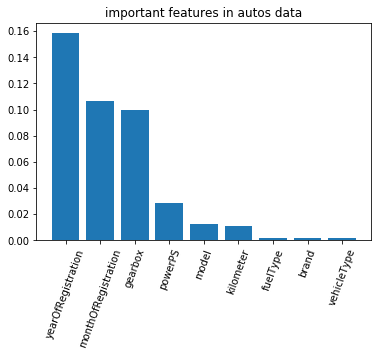

In [20]:
plt.xticks(rotation=70)
plt.bar(range(len(features)), [imp[1] for imp in features], align='center',tick_label = [imp[0] for imp in features])

plt.title('important features in autos data');

In [21]:
# 4. Apply various regression models and find out which model is the best for this dataset

# Excluding the columns vehicleType,fueltype and brand as they are not important features from the above bar plot. 
#df.select_dtypes(exclude=["number"])
X_dummies = df[['yearOfRegistration','powerPS', 'gearbox','kilometer','model','monthOfRegistration']]
X=pd.get_dummies(X_dummies, columns = ['gearbox', 'model'])
Y = df[['price']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape , Y_train.shape
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
r2=lr.score(X_train, Y_train)
adj_r2 = 1 - float(len(Y_train)-1)/(len(Y_train)-len(lr.coef_)-1)*(1 - r2)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
rmse,r2,adj_r2

(13799.131569765677, 0.009024752192484553, 0.008900849310788161)

In [22]:
X_train.columns.values

array(['yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_automatik', 'gearbox_manuell',
       'model_100', 'model_145', 'model_147', 'model_156', 'model_159',
       'model_1_reihe', 'model_1er', 'model_200', 'model_2_reihe',
       'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500',
       'model_5_reihe', 'model_5er', 'model_601', 'model_6_reihe',
       'model_6er', 'model_7er', 'model_80', 'model_850', 'model_90',
       'model_900', 'model_911', 'model_a1', 'model_a2', 'model_a3',
       'model_a4', 'model_a5', 'model_a6', 'model_a8', 'model_a_klasse',
       'model_accord', 'model_agila', 'model_alhambra', 'model_almera',
       'model_altea', 'model_amarok', 'model_andere', 'model_antara',
       'model_arosa', 'model_astra', 'model_auris', 'model_avensis',
       'model_aveo', 'model_aygo', 'model_b_klasse', 'model_beetle',
       'model_berlingo', 'model_bora', 'model_boxster', 'model_bravo',
       'model_c1', 'model_c2', 'model_c3'

In [23]:
final_data = pd.concat([X_train, Y_train],axis=1)

import statsmodels.formula.api as sm
model1 = sm.ols(formula='price ~ yearOfRegistration+ powerPS+ kilometer+ monthOfRegistration+ gearbox_automatik+ gearbox_manuell+ model_100+ model_145+ model_147+ model_156+ model_159+ model_1_reihe+ model_1er+ model_200+ model_2_reihe+ model_3_reihe+ model_3er+ model_4_reihe+ model_500+ model_5_reihe+ model_5er+ model_601+ model_6_reihe+ model_6er+ model_7er+ model_80+ model_850+ model_90+ model_900+ model_911+ model_a1+ model_a2+ model_a3+ model_a4+ model_a5+ model_a6+ model_a8+ model_a_klasse+ model_accord+ model_agila+ model_alhambra+ model_almera+ model_altea+ model_amarok+ model_andere+ model_antara+ model_arosa+ model_astra+ model_auris+ model_avensis+ model_aveo+ model_aygo+ model_b_klasse+ model_beetle+ model_berlingo+ model_bora+ model_boxster+ model_bravo+ model_c1+ model_c2+ model_c3+ model_c4+ model_c5+ model_c_klasse+ model_c_max+ model_c_reihe+ model_caddy+ model_calibra+ model_captiva+ model_carisma+ model_carnival+ model_cayenne+ model_cc+ model_ceed+ model_cherokee+ model_citigo+ model_civic+ model_cl+ model_clio+ model_clk+ model_clubman+ model_colt+ model_combo+ model_cooper+ model_cordoba+ model_corolla+ model_corsa+ model_cr_reihe+ model_crossfire+ model_cuore+ model_cx_reihe+ model_defender+ model_delta+ model_discovery+ model_doblo+ model_ducato+ model_duster+ model_e_klasse+ model_eos+ model_escort+ model_espace+  model_exeo+ model_fabia+ model_fiesta+ model_focus+ model_forester+ model_forfour+ model_fortwo+ model_fox+ model_freelander+ model_fusion+ model_g_klasse+ model_galant+ model_galaxy+ model_getz+ model_gl+ model_glk+ model_golf+ model_grand+ model_i_reihe+ model_ibiza+ model_impreza+ model_insignia+ model_jazz+  model_jetta+ model_jimny+ model_juke+ model_justy+ model_ka+ model_kadett+ model_kaefer+ model_kalos+ model_kangoo+ model_kappa+ model_kuga+ model_laguna+ model_lancer+ model_lanos+ model_legacy+ model_leon+ model_lodgy+ model_logan+ model_lupo+ model_lybra+ model_m_klasse+ model_m_reihe+ model_materia+ model_matiz+ model_megane+ model_meriva+ model_micra+ model_mii+ model_modus+ model_mondeo+ model_move+ model_mustang+ model_mx_reihe+ model_navara+ model_niva+ model_note+ model_nubira+ model_octavia+ model_omega+ model_one+ model_outlander+ model_pajero+ model_panda+ model_passat+ model_phaeton+ model_picanto+ model_polo+ model_primera+ model_ptcruiser+ model_punto+ model_q3+ model_q5+ model_q7+ model_qashqai+ model_r19+ model_range_rover+ model_range_rover_evoque+ model_range_rover_sport+ model_rav+ model_rio+ model_roadster+ model_roomster+ model_rx_reihe+ model_s60+ model_s_klasse+ model_s_max+ model_s_type+ model_sandero+ model_santa+ model_scenic+ model_scirocco+ model_seicento+ model_sharan+ model_signum+ model_sirion+ model_sl+ model_slk+ model_sorento+ model_spark+ model_spider+ model_sportage+ model_sprinter+ model_stilo+ model_superb+ model_swift+ model_tigra+ model_tiguan+ model_toledo+ model_touareg+ model_touran+ model_transit+ model_transporter+ model_tt+ model_tucson+ model_twingo+ model_up+ model_v40+ model_v50+ model_v60+ model_v70+ model_v_klasse+ model_vectra+ model_verso+ model_viano+ model_vito+ model_vivaro+ model_voyager+ model_wrangler+ model_x_reihe+ model_x_trail+ model_x_type+ model_xc_reihe+ model_yaris+ model_yeti+ model_ypsilon+ model_z_reihe+ model_zafira', data=final_data)
#model1 = sm.ols(formula='price ~ yearOfRegistration+ powerPS+ kilometer+ monthOfRegistration+ gearbox_automatik+ gearbox_manuell+ model_100+ model_145+ model_147+ model_156+ model_159+ model_1_reihe+ model_1er+ model_200+ model_2_reihe+ model_3_reihe+ model_3er+ model_4_reihe+ model_500+ model_5_reihe+ model_5er+ model_601+ model_6_reihe+ model_6er+ model_7er+ model_80+ model_850+ model_90+ model_900+ model_911+ model_a1+ model_a2+ model_a3+ model_a4+ model_a5+ model_a6+ model_a8+ model_a_klasse+ model_accord+ model_agila+ model_alhambra+ model_almera+ model_altea+ model_amarok+ model_andere+ model_antara+ model_arosa+ model_astra+ model_auris+ model_avensis+ model_aveo+ model_aygo+ model_b_klasse+ model_beetle+ model_berlingo+ model_bora+ model_boxster+ model_bravo+ model_c1+ model_c2+ model_c3+ model_c4+ model_c5+ model_c_klasse+ model_c_max+ model_c_reihe+ model_caddy+ model_calibra+ model_captiva+ model_carisma+ model_carnival+ model_cayenne+ model_cc+ model_ceed+ model_cherokee+ model_citigo+ model_civic+ model_cl+ model_clio+ model_clk+ model_clubman+ model_colt+ model_combo+ model_cooper+ model_cordoba+ model_corolla+ model_corsa+ model_cr_reihe+ model_crossfire+ model_cuore+ model_cx_reihe+ model_defender+ model_discovery+ model_doblo+ model_ducato+ model_duster+ model_e_klasse+ model_eos+ model_escort+ model_espace+  model_exeo+ model_fabia+ model_fiesta+ model_focus+ model_forester+ model_forfour+ model_fortwo+ model_fox+ model_freelander+ model_fusion+ model_g_klasse+ model_galant+ model_galaxy+ model_getz+ model_gl+ model_glk+ model_golf+ model_grand+ model_i_reihe+ model_ibiza+ model_impreza+ model_insignia+ model_jazz+  model_jetta+ model_jimny+ model_juke+ model_justy+ model_ka+ model_kadett+ model_kaefer+ model_kalos+ model_kangoo+ model_kappa+ model_kuga+ model_laguna+ model_lancer+ model_lanos+ model_legacy+ model_leon+ model_lodgy+ model_logan+ model_lupo+ model_lybra+ model_m_klasse+ model_m_reihe+ model_materia+ model_matiz+ model_megane+ model_meriva+ model_micra+ model_mii+ model_modus+ model_mondeo+ model_move+ model_mustang+ model_mx_reihe+ model_navara+ model_niva+ model_note+ model_nubira+ model_octavia+ model_omega+ model_one+ model_outlander+ model_pajero+ model_panda+ model_passat+ model_phaeton+ model_picanto+ model_polo+ model_primera+ model_ptcruiser+ model_punto+ model_q3+ model_q5+ model_q7+ model_qashqai+ model_r19+ model_range_rover+ model_range_rover_evoque+ model_range_rover_sport+ model_rav+ model_rio+ model_roadster+ model_roomster+ model_rx_reihe+ model_s60+ model_s_klasse+ model_s_max+ model_s_type+ model_sandero+ model_santa+ model_scenic+ model_scirocco+ model_seicento+ model_sharan+ model_signum+ model_sirion+ model_sl+ model_slk+ model_sorento+ model_spark+ model_spider+ model_sportage+ model_sprinter+ model_stilo+ model_superb+ model_swift+ model_tigra+ model_tiguan+ model_toledo+ model_touareg+ model_touran+ model_transit+ model_transporter+ model_tt+ model_tucson+ model_twingo+ model_up+ model_v40+ model_v50+ model_v60+ model_v70+ model_v_klasse+ model_vectra+ model_verso+ model_viano+ model_vito+ model_vivaro+ model_voyager+ model_wrangler+ model_x_reihe+ model_x_trail+ model_x_type+ model_xc_reihe+ model_yaris+ model_yeti+ model_ypsilon+ model_z_reihe+ model_zafira', data=final_data)
fitted1 = model1.fit()
fitted1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.2983
Date:                Wed, 26 May 2021   Prob (F-statistic):               1.00
Time:                        17:45:30   Log-Likelihood:            -1.0601e+05
No. Observations:                8000   AIC:                         2.125e+05
Df Residuals:                    7762   BIC:                         2.142e+05
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.027e+04   4.71e+04      0.218      0.827   -8.21e+04    1.03e+05
yearOfRegistration           1.9138     35.059      0.055      0.956     -66.811      70.639
powerPS                      1.2192      4.799      0.254      0.799      -8.187      10.626
kilometer                   -0.0599      0.042     -1.429      0.153      -0.142       0.022
monthOfRegistration       -554.0005    431.075     -1.285      0.199   -1399.023     291.022
gearbox_automatik         6932.0678   2.37e+04      0.292      0.770   -3.96e+04    5.34e+04
gearbox_manuell           3342.0368   2.36e+04      0.142      0.887    -4.3e+04    4.96e+04
model_100                -4145.7878   4.66e+04     -0.089      0.929   -9.54e+04    8.72e+04
model_145                -6091.4070   1.39e+05     -0.044      0.965   -2.79e+05    2.67e+05
model_147                -3904.6186   3.88e+04     -0.101      0.920      -8e+04    7.22e+04
model_156                -5423.1434   4.05e+04     -0.134      0.893   -8.47e+04    7.39e+04
model_159                 4138.5019   6.97e+04      0.059      0.953   -1.33e+05    1.41e+05
model_1_reihe            -6603.9047   2.62e+04     -0.252      0.801    -5.8e+04    4.48e+04
model_1er                 3787.8894   1.56e+04      0.243      0.808   -2.68e+04    3.44e+04
model_200                 -635.1661   1.39e+05     -0.005      0.996   -2.74e+05    2.72e+05
model_2_reihe            -3722.3984   1.44e+04     -0.258      0.796    -3.2e+04    2.46e+04
model_3_reihe            -2979.5333   1.66e+04     -0.179      0.858   -3.56e+04    2.96e+04
model_3er                 -526.4378   7865.462     -0.067      0.947   -1.59e+04    1.49e+04
model_4_reihe            -2501.5904   4.04e+04     -0.062      0.951   -8.17e+04    7.67e+04
model_500                -2835.7703      3e+04     -0.094      0.925   -6.17e+04    5.61e+04
model_5_reihe               60.0012   4.22e+04      0.001      0.999   -8.26e+04    8.27e+04
model_5er                 -449.7045   1.16e+04     -0.039      0.969   -2.31e+04    2.22e+04
model_601                -9498.6858   5.29e+04     -0.180      0.857   -1.13e+05    9.41e+04
model_6_reihe            -1134.5832   2.58e+04     -0.044      0.965   -5.17e+04    4.94e+04
model_6er                 1.456e+04   5.28e+04      0.276      0.783    -8.9e+04    1.18e+05
model_7er                 -248.2166   2.64e+04     -0.009      0.992    -5.2e+04    5.15e+04
model_80                 -5668.6257   2.54e+04     -0.223      0.823   -5.54e+04    4.41e+04
model_850                 3.505e-08    2.6e-07      0.135      0.893   -4.74e-07    5.44e-07
model_90                 -5665.0394   8.05e+04     -0.070      0.944   -1.63e+05    1.52e+05
model_900                -6021.9066   8.05e+04     -0.075      0.940   -1.64e+05    1.52e+05
model_911     

In [24]:
#Removing model column as P value is greater than 0.05 and greater than other features.
X_dummies = df[['yearOfRegistration','powerPS', 'gearbox','kilometer','monthOfRegistration']]
X=pd.get_dummies(X_dummies, columns = ['gearbox'])
Y = df[['price']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape , Y_train.shape
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
r2=lr.score(X_train, Y_train)
adj_r2 = 1 - float(len(Y_train)-1)/(len(Y_train)-len(lr.coef_)-1)*(1 - r2)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
rmse,r2,adj_r2

(8378.476004642163, 0.0006945554416286637, 0.0005696110249546749)

In [25]:
X_train.columns.values

array(['yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_automatik', 'gearbox_manuell'],
      dtype=object)

In [26]:
final_data = pd.concat([X_train, Y_train],axis=1)

import statsmodels.formula.api as sm
model1 = sm.ols(formula='price ~ yearOfRegistration+powerPS+kilometer+monthOfRegistration+gearbox_automatik+gearbox_manuell', data=final_data)
fitted1 = model1.fit()
fitted1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.111
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.352
Time:                        17:45:30   Log-Likelihood:            -1.0605e+05
No. Observations:                8000   AIC:                         2.121e+05
Df Residuals:                    7994   BIC:                         2.121e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6714.8652   4.65e+04      0.144      0.885   -8.44e+04    9.79e+04
yearOfRegistration      4.2750     34.556      0.124      0.902     -63.464      72.014
powerPS                 2.4813      4.697      0.528      0.597      -6.727      11.689
kilometer              -0.0590      0.038     -1.543      0.123      -0.134       0.016
monthOfRegistration  -504.8397    417.615     -1.209      0.227   -1323.474     313.795
gearbox_automatik    5437.3342   2.34e+04      0.233      0.816   -4.04e+04    5.13e+04
gearbox_manuell      1277.5310   2.33e+04      0.055      0.956   -4.44e+04    4.69e+04
==============================================================================
Omnibus:                    30674.376   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20970355840.822
Skew:                          88.880   Prob(JB):                         0.00
Kurtosis:                    7932.658   Cond. No.                     9.29e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Break into left and right hand side; y and X
Y, X = dmatrices("price ~ yearOfRegistration+powerPS+kilometer+monthOfRegistration+gearbox_automatik+gearbox_manuell", data=final_data, return_type="dataframe")
        
## For each X, calculate VIF and save in dataframe

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns
vif_pd =pd.DataFrame({'VIF_Value':vif})
vif_pd["features"] = X.columns
vif_pd


C:\Users\SHUBHA\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\SHUBHA\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Value,features
0,0.000000,Intercept
1,1.003246,yearOfRegistration
2,1.011975,powerPS
3,1.005118,kilometer
4,1.003742,monthOfRegistration
5,inf,gearbox_automatik
6,inf,gearbox_manuell


In [28]:
# Removing gearbox column as P value is greater than 0.05 and greater than other features.
X = df[['yearOfRegistration','powerPS','kilometer','monthOfRegistration']]
#X=pd.get_dummies(X_dummies, columns = ['gearbox'])
Y = df[['price']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape , Y_train.shape
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
r2=lr.score(X_train, Y_train)
adj_r2 = 1 - float(len(Y_train)-1)/(len(Y_train)-len(lr.coef_)-1)*(1 - r2)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
rmse,r2,adj_r2

(8592.22326760663, 0.0005460822898629702, 0.00042111930940402775)

In [29]:
X_train.columns.values

array(['yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration'], dtype=object)

In [30]:
final_data = pd.concat([X_train, Y_train],axis=1)

import statsmodels.formula.api as sm
model1 = sm.ols(formula='price ~ yearOfRegistration+powerPS+kilometer+monthOfRegistration', data=final_data)
fitted1 = model1.fit()
fitted1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.092
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.359
Time:                        17:45:37   Log-Likelihood:            -1.0605e+05
No. Observations:                8000   AIC:                         2.121e+05
Df Residuals:                    7995   BIC:                         2.121e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8185.5040   6.97e+04      0.117      0.907   -1.28e+05    1.45e+05
yearOfRegistration      4.6152     34.555      0.134      0.894     -63.122      72.353
powerPS                 3.0356      4.670      0.650      0.516      -6.118      12.190
kilometer              -0.0607      0.038     -1.590      0.112      -0.136       0.014
monthOfRegistration  -477.8878    416.887     -1.146      0.252   -1295.095     339.320
==============================================================================
Omnibus:                    30670.578   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20948788529.511
Skew:                          88.846   Prob(JB):                         0.00
Kurtosis:                    7928.578   Cond. No.                     5.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Break into left and right hand side; y and X
Y, X = dmatrices("price ~ yearOfRegistration+powerPS+kilometer+monthOfRegistration", data=final_data, return_type="dataframe")
        
## For each X, calculate VIF and save in dataframe

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns
vif_pd =pd.DataFrame({'VIF_Value':vif})
vif_pd["features"] = X.columns
vif_pd


,VIF_Value,features
0,2033.977858,Intercept
1,1.003164,yearOfRegistration
2,1.000111,powerPS
3,1.003382,kilometer
4,1.000222,monthOfRegistration


In [32]:
# 5. Apply RandomForestRegressor and compare the results with DecisionTree.

In [40]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

print("Mean Square Error for dt: "+str(sqrt(mean_squared_error(Y_test, y_pred_dt))))



Mean Square Error for dt: 8794.97902957086


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=60)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

print("Mean Square Error rf: "+str(sqrt(mean_squared_error(Y_test, y_pred_rf))))
from math import sqrt
r2=dt.score(X_train, Y_train)
r2



C:\Users\SHUBHA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean Square Error rf: 87636.47437389226


0.9999579080844253

In [305]:
#Decision Tree results(mean square error) are less compared to RandomForestRegressor. 